In [428]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
import category_encoders as ce


In [429]:
df19 = pd.read_csv('data/agents2019.csv', index_col='Unnamed: 0')
df19.tail()

,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB",...,"2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
526,526,0,0.0,0,0.0,0,0.000000,0.000000,0.00000,0.000000e+00,...,1.154089e+08,7.701656e+07,4.891146e+07,1.047255e+08,7.961783e+05,7.751592e+05,6.176433e+06,1.174522e+06,8.923567e+05,6.782166e+06
527,527,0,0.0,0,0.0,0,49044.585987,33757.961783,18471.33758,1.633268e+08,...,1.188227e+09,1.177027e+09,1.066488e+09,1.008364e+09,1.490363e+08,1.553159e+08,8.043376e+07,1.426694e+08,1.465019e+08,6.499554e+07
528,528,0,0.0,0,0.0,0,0.000000,0.000000,0.00000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
529,529,0,0.0,0,0.0,0,0.000000,0.000000,0.00000,1.160127e+07,...,4.278682e+08,5.936943e+06,4.680955e+07,1.300605e+08,1.160510e+06,5.324204e+07,1.720955e+08,3.604459e+06,7.276369e+07,2.052898e+08
530,530,0,0.0,0,0.0,0,0.000000,0.000000,0.00000,0.000000e+00,...,1.448790e+07,0.000000e+00,0.000000e+00,1.213758e+07,0.000000e+00,0.000000e+00,1.076433e+06,0.000000e+00,0.000000e+00,1.359236e+06


In [430]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 530
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Наименование ДП                                    531 non-null    int64  
 1   Макс. ПДЗ за 2019 год, дней                        531 non-null    int64  
 2   Сред. ПДЗ за 2019 год, дней                        531 non-null    float64
 3   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  531 non-null    int64  
 4   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  531 non-null    float64
 5   Кол-во раз ПДЗ за 2019 год, шт.                    531 non-null    int64  
 6   2016, Нематериальные активы, RUB                   531 non-null    float64
 7   2017, Нематериальные активы, RUB                   531 non-null    float64
 8   2018, Нематериальные активы, RUB                   531 non-null    float64
 9   2016, Осно

/tmp/ipykernel_4095/2180312271.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df19.hist(ax=ax1);


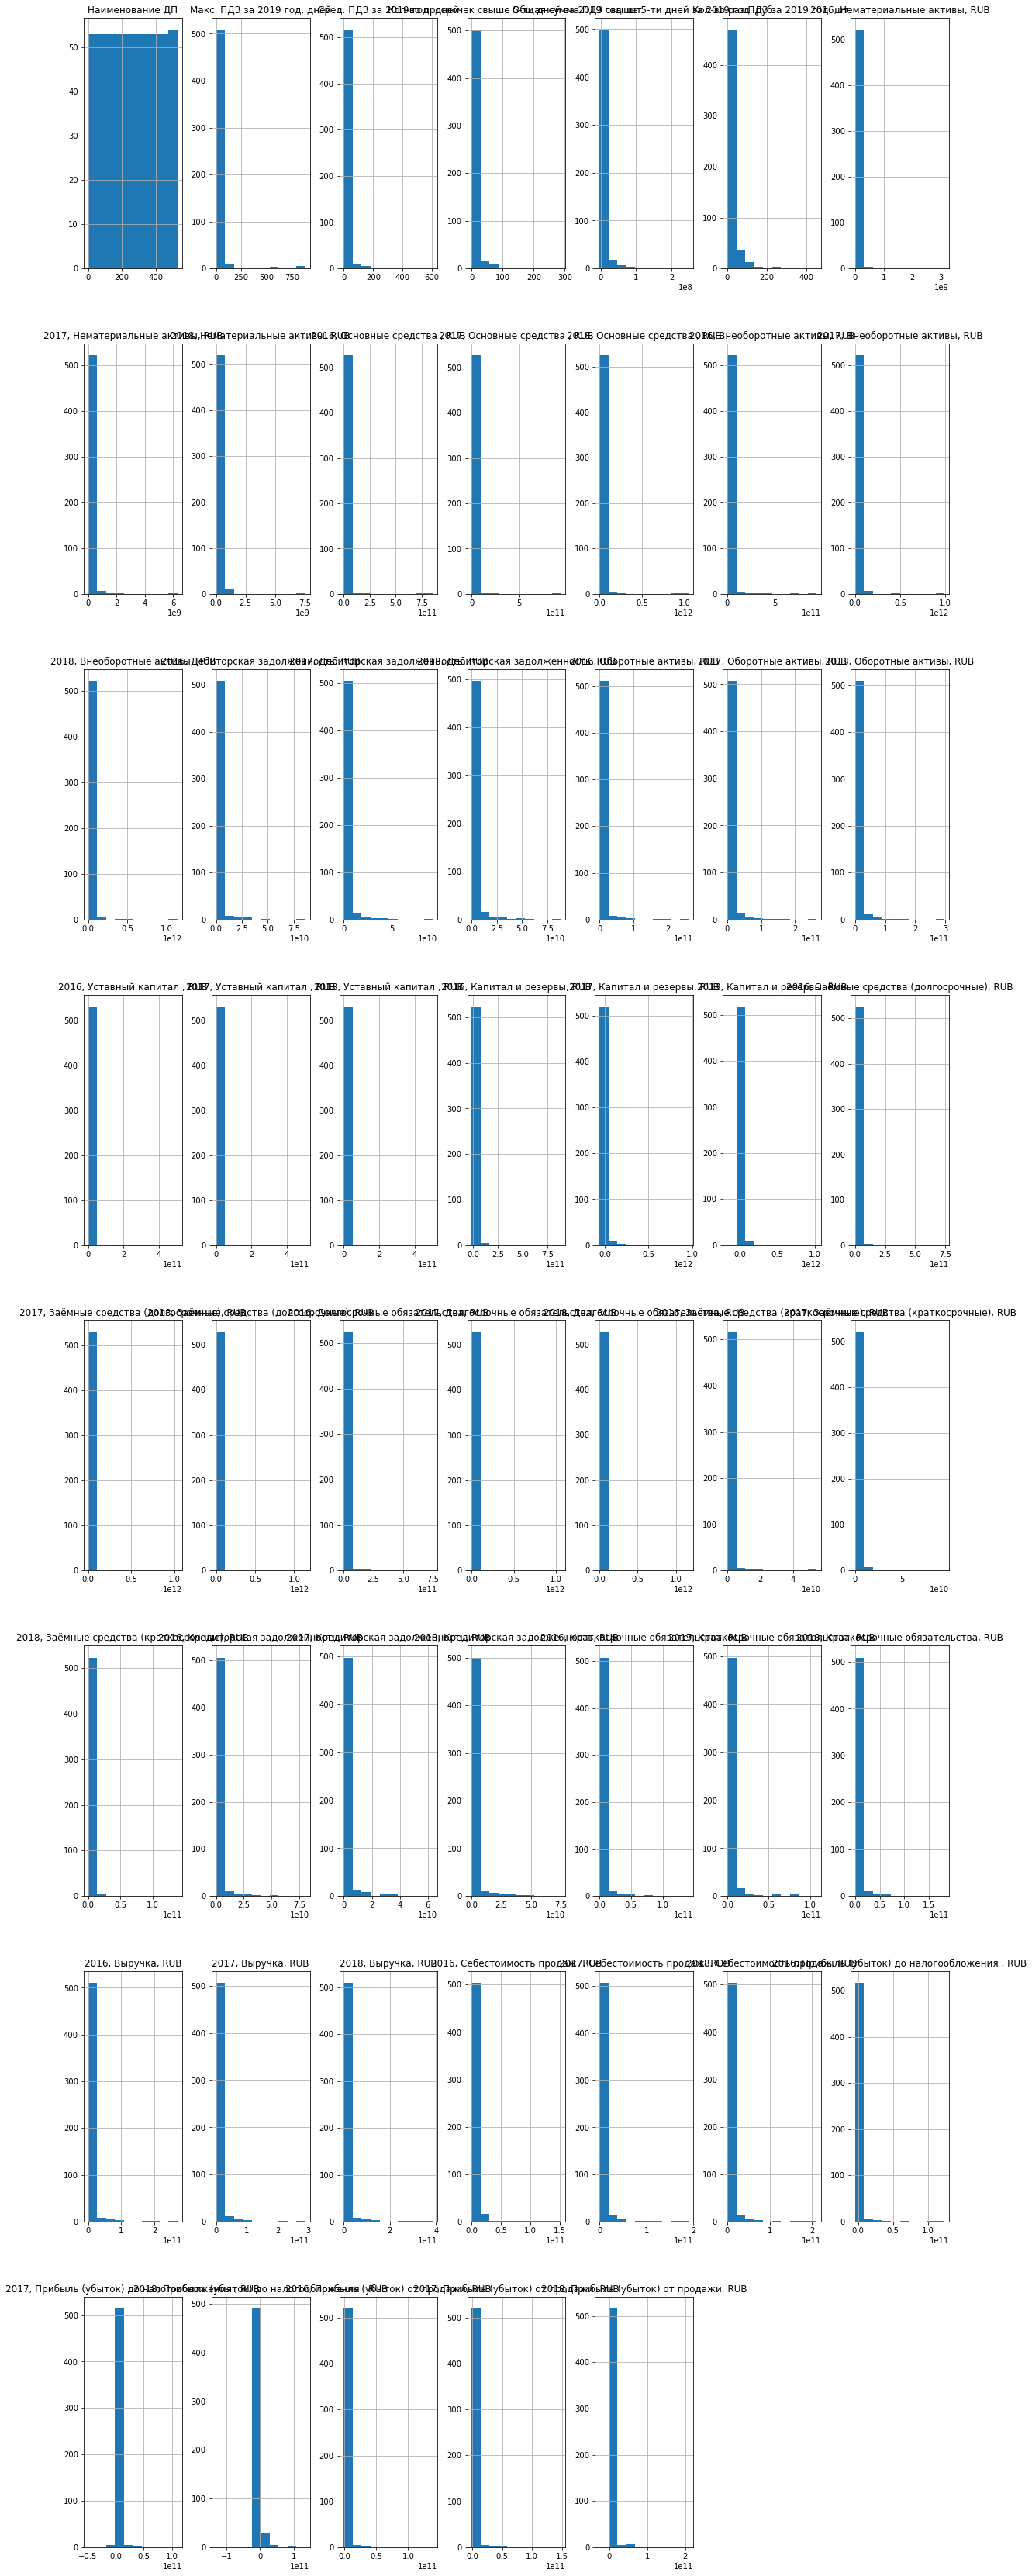

In [431]:
fig, (ax1) = plt.subplots(figsize=(20,60))
df19.hist(ax=ax1);

    В 2019 году слишком манло информации, чтобы ее анализировать

### Смотрю 2020

In [432]:
df20 = pd.read_csv('data/agents2020.csv')
df20.tail()
print(f'Сейчас в датасете {df20.shape[1]} признаков')

Сейчас в датасете 131 признаков


In [433]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Columns: 131 entries, Наименование ДП to 2019, Прибыль (убыток) от продажи, RUB
dtypes: float64(67), int64(4), object(60)
memory usage: 543.6+ KB


In [434]:
print(*list(df20.columns), sep='<!>')

Наименование ДП<!>Факт. 1<!>Факт. 2<!>Факт. 3<!>Факт. 4<!>Факт. 5<!>Факт. 6<!>Факт. 7<!>Факт. 8<!>Факт. 9<!>Факт. 10<!>Факт. 11<!>Факт. 12<!>Факт. 13<!>Факт. 14<!>Факт. 15<!>Факт. 16<!>Факт. 17<!>Факт. 18<!>Факт. 19<!>Факт. 20<!>Факт. 21<!>Факт. 22<!>Факт. 23<!>Факт. 24<!>Факт. 25<!>Факт. 26<!>Факт. 27<!>Факт. 28<!>Факт. 29<!>Факт. 30<!>Факт. 31<!>Факт. 32<!>Факт. 33<!>Факт. 34<!>Факт. 35<!>Факт. 36<!>Факт. 37<!>Факт. 38<!>Факт. 39<!>Факт. 40<!>Факт. 41<!>Факт. 42<!>Факт. 43<!>Факт. 44<!>Факт. 45<!>Факт. 46<!>Факт. 47<!>Факт. 48<!>Факт. 49<!>Факт. 50<!>Факт. 51<!>Факт. 52<!>Факт. 53<!>Факт. 54<!>Факт. 55<!>Факт. 56<!>Факт. 57<!>Факт. 58<!>Факт. 59<!>Факт. 60<!>Итого<!>Макс. ПДЗ за 2020 год, дней<!>Сред. ПДЗ за 2020 год, дней<!>Кол-во просрочек свыше 5-ти дней за 2020 год, шт.<!>Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.<!>Кол-во раз ПДЗ за 2020 год, шт.<!>2016, Нематериальные активы, RUB<!>2017, Нематериальные активы, RUB<!>2018, Нематериальные активы, RUB<!>2019, Нематериальные

In [435]:
# fig, (ax1) = plt.subplots(figsize=(20,20))
df20.loc[:, 'Факт. 1':'Итого']

,Факт. 1,Факт. 2,Факт. 3,Факт. 4,Факт. 5,Факт. 6,Факт. 7,Факт. 8,Факт. 9,Факт. 10,...,Факт. 52,Факт. 53,Факт. 54,Факт. 55,Факт. 56,Факт. 57,Факт. 58,Факт. 59,Факт. 60,Итого
0,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,Н/Д,Х,Х,Х,Х,Х,Х,10.0
1,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,10,Х,Х,Х,Х,Х,Х,20.0
2,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,Н/Д,Х,Х,Х,Х,Х,Х,40.0
3,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,10,Х,Х,Х,Х,Х,Х,10.0
4,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,10,Х,Х,Х,Х,Х,Х,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,10,Х,Х,Х,Х,Х,Х,70.0
527,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,Н/Д,Х,Х,Х,Х,Х,Х,0.0
528,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,Н/Д,Х,Х,Х,Х,Х,Х,50.0
529,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,Х,Х,Х,Х,Х,Х,Х,Х,Х,70.0


In [436]:
df20.loc[:, 'Факт. 1':'Итого'].isna().sum().sort_values(ascending=False)
# df20.loc['Факт. 1':'Итого']#.isna().sum().sort_values(ascending=False)

Итого       6
Факт. 32    0
Факт. 34    0
Факт. 35    0
Факт. 36    0
           ..
Факт. 26    0
Факт. 27    0
Факт. 28    0
Факт. 29    0
Факт. 31    0
Length: 61, dtype: int64

Данные поля содерат пропуски, а так же скрытые пропуски **Н/Д**

In [437]:
df20_crop = df20.loc[:,'Факт. 1':'Факт. 60']
df20_crop_nan = (100 / df20_crop.shape[0] * (df20_crop == 'Н/Д').sum()).sort_values(ascending=False)
df20_crop_nan.head()

Факт. 33    48.399247
Факт. 54    46.704331
Факт. 51     2.448211
Факт. 57     1.694915
Факт. 58     1.129944
dtype: float64

Удаляю признаки в которых больше 30% пропусков

In [438]:
drop_col = list(df20_crop_nan[df20_crop_nan > 30].index)
df20.drop(drop_col, axis=1, inplace=True)
print(f'Удалил признаки {drop_col}')
print(f'Сейчас в датасете {df20.shape[1]} признаков')

Удалил признаки ['Факт. 33', 'Факт. 54']
Сейчас в датасете 129 признаков


In [439]:
# Заменяю все пропуски, Н/Д и Х на 0
df20.loc[:,'Факт. 1':'Итого'] = df20.loc[:,'Факт. 1':'Итого'].replace('Х',0,)
df20.loc[:,'Факт. 1':'Итого'] = df20.loc[:,'Факт. 1':'Итого'].replace('Н/Д',0)
df20.loc[:,'Факт. 1':'Итого'] = df20.loc[:,'Факт. 1':'Итого'].replace(np.nan,0)
# Изменяю распределение признаков с 0-100 на 0-1
df20.loc[:,'Факт. 1':'Итого'] = df20.loc[:,'Факт. 1':'Итого'].astype('float')
df20.loc[:,'Факт. 1':'Итого'] = df20.loc[:,'Факт. 1':'Итого'] / 100

In [440]:
df20.loc[:,'Макс. ПДЗ за 2020 год, дней':]

,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2016, Основные средства , RUB",...,"2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
0,10,6.400000,4,2.229696e+06,5,2.895541e+06,6.245860e+06,9.050955e+06,9.885987e+06,1.889724e+09,...,3.438313e+10,2.673481e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.603784e+09,3.280355e+09,6.200120e+09,8.716191e+08,3.658634e+09
1,4,4.000000,0,0.000000e+00,1,0.000000e+00,3.885350e+04,3.439490e+04,2.929936e+04,1.448108e+08,...,4.169796e+08,5.349955e+08,1.212357e+07,6.944586e+06,4.480064e+07,8.747516e+07,1.630064e+07,1.109172e+07,5.135732e+07,9.411019e+07
2,6,5.333333,2,3.759242e+06,3,2.468153e+06,1.288025e+07,8.694904e+06,4.958599e+06,9.698064e+08,...,2.316724e+09,2.460679e+09,5.026662e+08,3.644229e+08,8.552994e+07,-6.456439e+08,4.148586e+08,1.611318e+08,-9.298981e+07,-1.207210e+08
3,8,6.200000,3,7.152927e+06,5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.874127e+09,...,1.171315e+10,1.272604e+10,4.100857e+09,4.481281e+09,6.840634e+09,3.999298e+09,4.903117e+09,5.186553e+09,7.869977e+09,4.029232e+09
4,1,1.000000,0,0.000000e+00,2,5.503185e+05,5.210191e+05,4.490446e+05,3.987261e+05,2.633161e+10,...,2.652547e+10,3.055828e+10,7.163980e+10,3.799862e+10,4.593606e+10,4.960408e+10,2.338912e+10,3.727984e+10,5.307524e+10,5.622122e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,0.000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.047255e+08,2.884618e+08,7.961783e+05,7.751592e+05,6.176433e+06,1.580637e+07,1.174522e+06,8.923567e+05,6.782166e+06,2.074204e+07
527,0,0.000000,0,0.000000e+00,0,4.904459e+04,3.375796e+04,1.847134e+04,8.917197e+03,1.633268e+08,...,1.008364e+09,9.064178e+08,1.490363e+08,1.553159e+08,8.043376e+07,6.917389e+07,1.426694e+08,1.465019e+08,6.499554e+07,7.620446e+07
528,0,0.000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
529,0,0.000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,3.248408e+04,1.160127e+07,...,1.300605e+08,5.352535e+08,1.160510e+06,5.324204e+07,1.720955e+08,4.331529e+07,3.604459e+06,7.276369e+07,2.052898e+08,1.427178e+08


In [441]:
df20.loc[:,'Макс. ПДЗ за 2020 год, дней':].isna().sum().sort_values(ascending=False)

Макс. ПДЗ за 2020 год, дней                    0
2019, Заёмные средства (краткосрочные), RUB    0
2017, Краткосрочные обязательства, RUB         0
2016, Краткосрочные обязательства, RUB         0
2019, Кредиторская задолженность, RUB          0
                                              ..
2016, Капитал и резервы, RUB                   0
2017, Капитал и резервы, RUB                   0
2018, Капитал и резервы, RUB                   0
2019, Капитал и резервы, RUB                   0
2019, Прибыль (убыток) от продажи, RUB         0
Length: 69, dtype: int64

Пропуски отсутствуют, скрытые пропуски не искал

/tmp/ipykernel_4095/581179071.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df20.loc[:,'Макс. ПДЗ за 2020 год, дней':].hist(ax=ax1);


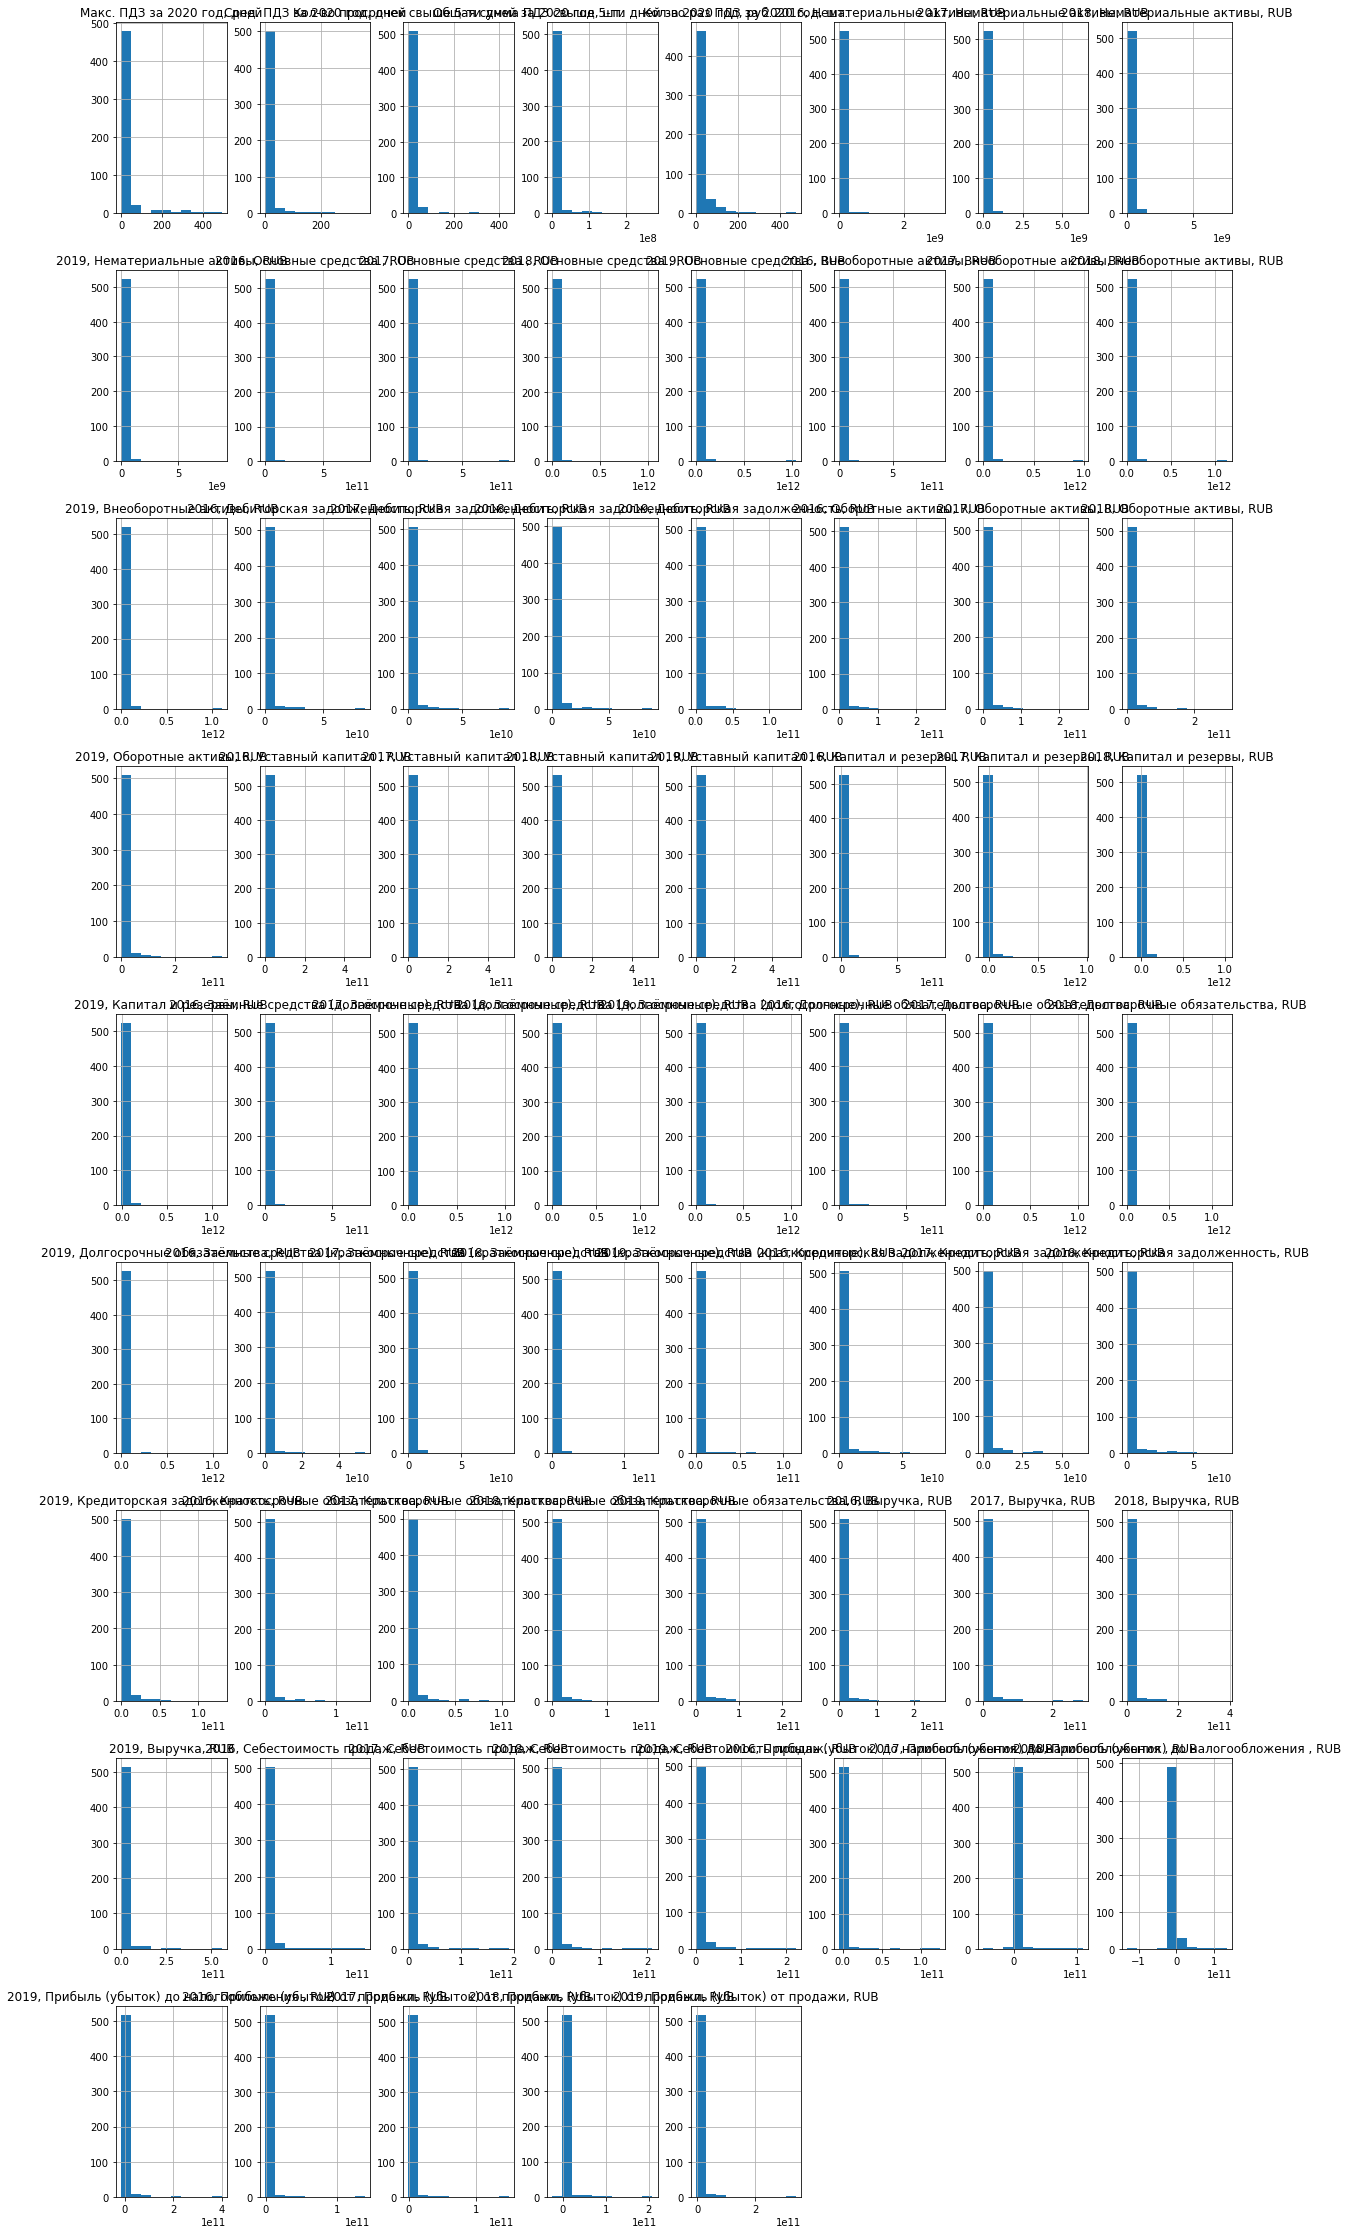

In [442]:
fif, (ax1) = plt.subplots(figsize=(20,40))
df20.loc[:,'Макс. ПДЗ за 2020 год, дней':].hist(ax=ax1);

Видно что моштаб всех осей 1e11, нормализирую данные

### Пропущен раздел про создание новых признаков

### Нормализую признаки

/tmp/ipykernel_4095/2581872693.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_r.hist(ax=ax1);


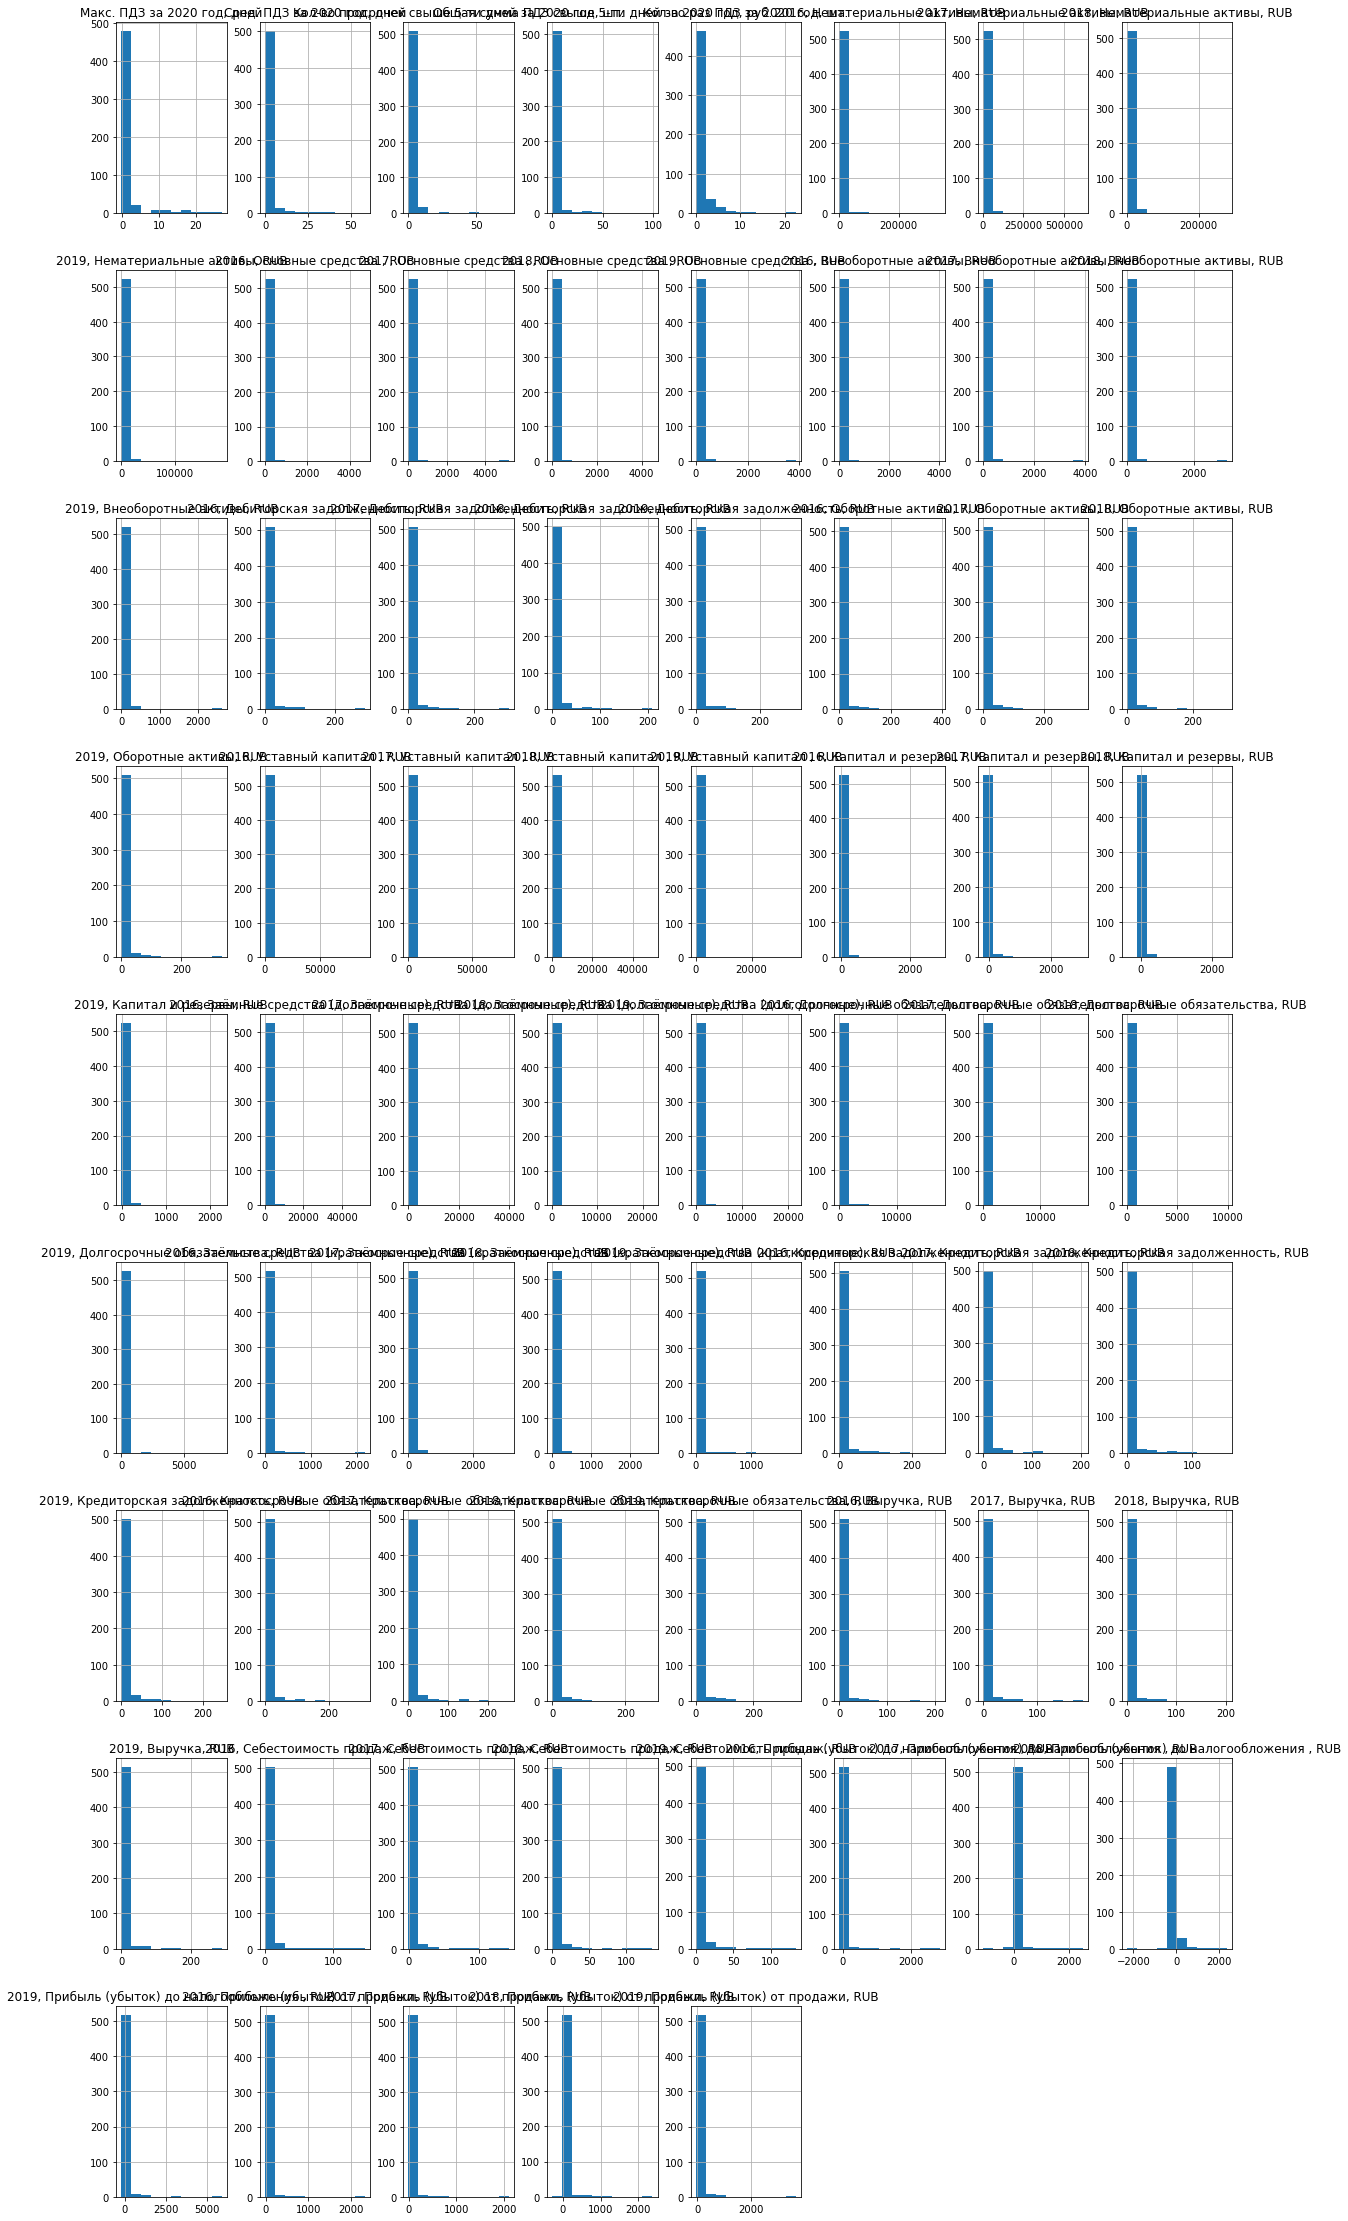

In [443]:
cols_robust = df20.loc[:,'Макс. ПДЗ за 2020 год, дней':].columns

r_scaler = preprocessing.RobustScaler()
np_r = r_scaler.fit_transform(df20[cols_robust])
df_r = pd.DataFrame(np_r, columns=cols_robust)
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 40))
df_r.hist(ax=ax1);

#Заменяю данные нормализированными
df20[cols_robust] = df_r

    Факторы надо категоризировать и заменять
    перед нормализацией остальных признаков надо создать новые
    1. разница в доходах за разные годы
    2. разница в расходах за разные годы
    3. доход минус расход
    норализую остальные признаки
    смотрю на корреляцию
    1. удаляю с сильной корреляцией >=0.7
    

### Сформирую таблицу корреляции и выведу только значения > 0.7

In [444]:
df20_corr = df20.corr('kendall')

In [445]:
for i in range(df20_corr.shape[0]):
    for j in range(i, df20_corr.shape[1]):
        df20_corr.iloc[i,j] = 0
# display(df20_corr)
df20_corr_heat = df20_corr[df20_corr.max()>0.7]

# df20_corr_heat = df20_corr_heat.round(2)
# fig, (ax1) = plt.subplots(figsize=(30,30))
# sns.heatmap(df20_corr_heat, annot=True, ax=ax1);

In [446]:
corr_20 = pd.DataFrame(columns=['col1','col2','corr'])
k = 0.7
# if True:
for column in df20_corr_heat.columns:
    # column = df20.columns[0]
    # display(df20_corr[column][df20_corr[column].abs()>k])
    for items in df20_corr[column][df20_corr[column].abs()>k].items():
        # print(items)
        # corr_20 = corr_20.append({'col1' : column, 
        #                           'col2' : items[0], 
        #                           'corr' : items[1]}, ignore_index=True)
        # display(pd.DataFrame([[column, items[0], items[1]]],columns=['col1','col2','corr']))
        corr_20 = pd.concat([corr_20,
                             pd.DataFrame([[column, items[0], items[1]]],columns=['col1','col2','corr'])
                             ],
                            axis=0, ignore_index=True)
corr_20

,col1,col2,corr
0,Факт. 1,Факт. 12,1.0
1,Факт. 2,Факт. 3,0.725393
2,Факт. 5,Факт. 16,1.0
3,Факт. 7,Факт. 48,0.706439
4,Факт. 24,Факт. 28,1.0
...,...,...,...
180,"2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB",0.836548
181,"2016, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB",0.756531
182,"2017, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) от продажи, RUB",0.749097
183,"2018, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) от продажи, RUB",0.746348


Эти признаки слишком сильно связаны и необходимо удалить все признаки из столбца **col2**

In [447]:
corr_20[corr_20.col1 == 'Макс. ПДЗ за 2020 год, дней']

,col1,col2,corr
7,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней",0.865774
8,"Макс. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",0.71151


    !!! Целевой признак сильно связан только с текущими, начну удаение признаков с них
    Переработать, не совсем логично удалять то что ищем
    Вместо этого надо заранее удалить те признаки, которые нельзя использовать в данных

In [448]:
coll_del =  list(corr_20[corr_20.col1 == 'Макс. ПДЗ за 2020 год, дней'].col2.unique())
df20.drop(coll_del, axis=1, inplace=True)
print(f'Сейчас в датасете {df20.shape[1]} признаков')

Сейчас в датасете 127 признаков


Теперь удаляю остальные признаки с сильной связью

In [449]:
# Формирую список признаков для удаления
coll_del = list(corr_20.col2.unique())
# Удаляю из него те признаки. которые я уже удалил
for x in list(corr_20[corr_20.col1 == 'Макс. ПДЗ за 2020 год, дней'].col2.unique()):
    coll_del.remove(x)
df20.drop(coll_del, axis=1, inplace=True)
print(f'Сейчас в датасете {df20.shape[1]} признаков')

Сейчас в датасете 69 признаков


Оставшиеся признаки находятся в  такой корреляции с искомым

In [450]:
# обновлю теплоовую карту
corr_20 = df20.corr('kendall')

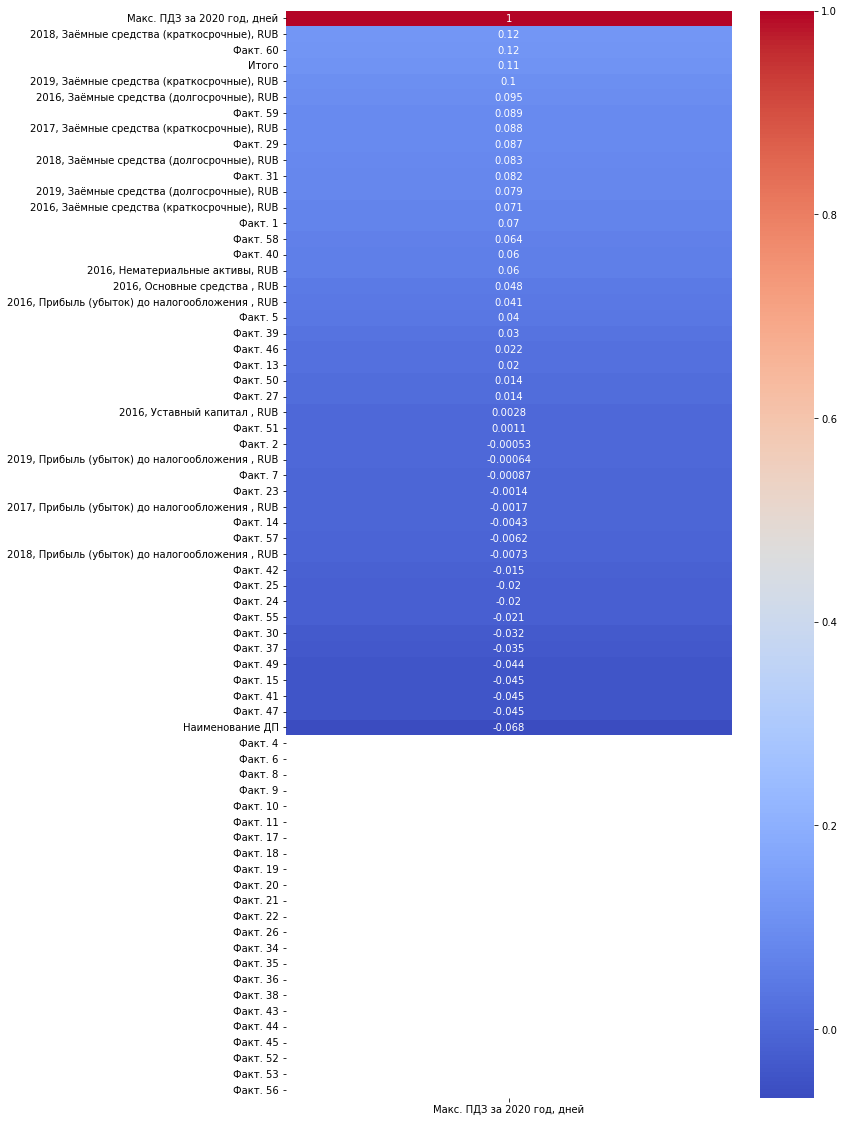

In [451]:
df_temp = corr_20[['Макс. ПДЗ за 2020 год, дней']].sort_values(by='Макс. ПДЗ за 2020 год, дней',ascending=False)

fig, (ax1) = plt.subplots(figsize=(10,20))
sns.heatmap(df_temp, 
            annot=True, 
            # vmin=-1,
            # vmax=1,
            cmap='coolwarm',
            ax=ax1); #['Макс. ПДЗ за 2020 год, дней']
# df_temp

In [452]:
# Удаляю все признаки, корреляйия которых с искомым меньше 10%
mask = df_temp['Макс. ПДЗ за 2020 год, дней']< 0.1
coll_del = list(df_temp[mask].index)
df20.drop(coll_del, axis=1, inplace=True)
print(f'Сейчас в датасете {df20.shape[1]} признаков')

Сейчас в датасете 28 признаков


### Удаляю признаки, в которых меньше 3% уникальных значений

In [453]:
mask =  100 / df20.shape[0] * df20.nunique()
coll_del = list(mask[mask < 3].index)
df20.drop(coll_del, axis=1, inplace=True)
print(f'Сейчас в датасете {df20.shape[1]} признаков')

Сейчас в датасете 4 признаков


### Сохраняю обработанные данные в файл для обучения моделью

In [454]:
df20.to_csv('data/feature_check_003.csv')

In [455]:
df20

,Итого,"Макс. ПДЗ за 2020 год, дней","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB"
0,0.1,0.277778,7.214815,-0.055626
1,0.2,-0.055556,1.139539,1.245327
2,0.4,0.055556,-0.033402,-0.055626
3,0.1,0.166667,17.819964,30.266311
4,0.2,-0.222222,250.483022,406.318467
...,...,...,...,...
526,0.7,-0.277778,-0.033402,-0.055626
527,0.0,-0.277778,-0.033402,-0.055626
528,0.5,-0.277778,-0.033402,-0.055626
529,0.7,-0.277778,0.681483,-0.039705


In [456]:
df20.columns

Index(['Итого', 'Макс. ПДЗ за 2020 год, дней',
       '2018, Заёмные средства (краткосрочные), RUB',
       '2019, Заёмные средства (краткосрочные), RUB'],
      dtype='object')